<a href="https://colab.research.google.com/github/ngsudharshan/Minor-Project/blob/main/Spam_Classifier_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!git clone https://github.com/ngsudharshan/Minor-Project.git

Cloning into 'Minor-Project'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.


In [16]:
# Natural language Tool Kit 


import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#Loading the Dataset

In [18]:
import pandas as pd
import nltk
import re
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer
#nltk.download('stopwords')
from nltk.corpus import stopwords 
mail = pd.read_csv('/content/Minor-Project/SMSSpamCollection.txt', sep='\t',
                           names=["label", "message"])


# the above note pad is 2 parts 1st column represent the lable spam or ham 
# then the dependent var and independent var is is sepereated by one tab so /t

#and there is no column name so im forcingly specifying 2 heading . 1st is lable and 2nd is message

# now data cleaning and pre processssssssssngs




    



In [12]:
mail.head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
mail.tail()

,label,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [14]:
mail.shape

(5572, 2)

#**Text Pre-Processing**

In [ ]:

ps=PorterStemmer()# stemming purpose 
lem=WordNetLemmatizer()
corpus=[]

for i in range(0,len(mail)):
    
    review = re.sub('[^a-zA-z]',' ',mail['message'][i])# space is given in 2nd parameter of sub 
    review=review.lower()
    review=review.split()
    
    review=[lem.lemmatize(word) for word in review if not word in stopwords.words('english')]
    
    review=' '.join(review) # words int o sentence 
    corpus.append(review)
    

**Word Vectoring**

In [ ]:

#when i use CountVectorizer bag of words  , i get accuracy of 0.9850478468899522
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000)# here the max_feature will take top 5k most important word  up to 5000 words 
x=cv.fit_transform(corpus).toarray()# this is the date that we will be training 

# we have target var as ham and spam so we gonna make it mumentrical as 1 for spam and 0 for ham 

y=pd.get_dummies(mail['label'])

# here this y cnsisit of 1 as ham and 0 as spam , and it has 2 columns differently so we re going to make it one column 
y=y.iloc[:,1].values  # now 0 means its ham and 1 means it spam 

from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


#**Model Training and Testing with Confusion Matrix**

**1) Model : naive_bayes**

Using Naive Bayes model  Accuracy is 0.9850478468899522


Text(0.5, 1.0, 'ACCURACY SCORE 0.9850478468899522')

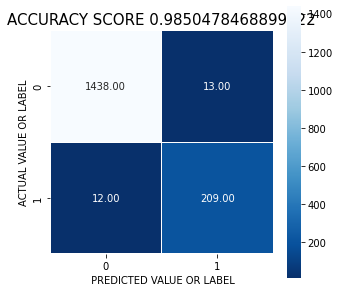

In [ ]:


#=================================================================
# using naves bayes 0.9850478468899522

from sklearn.naive_bayes import MultinomialNB
spam_detect=MultinomialNB()
train=spam_detect.fit(x_train,y_train)
y_pred=spam_detect.predict(x_test)
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)


print("Using Naive Bayes model  Accuracy is",acc)

import matplotlib.pyplot as plt 
import seaborn as sns 

plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt=".2f",linewidths=.10,square=True,cmap='Blues_r')
plt.ylabel("ACTUAL VALUE OR LABEL")
plt.xlabel(" PREDICTED VALUE OR LABEL")
all_sample_title="ACCURACY SCORE {0}".format(acc)
plt.title(all_sample_title,size=15)

**2) Model : LogisticRegression**

Using nLogisticRegression  Accuracy is 0.9814593301435407


Text(0.5, 1.0, 'ACCURACY SCORE 0.9814593301435407')

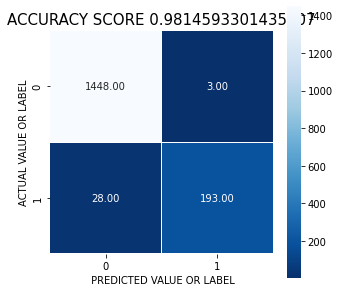

In [ ]:
# =================================================================
# using nLogisticRegression  i get accuracy 0.9820574162679426
from sklearn.linear_model import LogisticRegression
lrg=LogisticRegression()
lrg.fit(x_train,y_train)
y_pred=lrg.predict(x_test)

from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)


print("Using nLogisticRegression  Accuracy is",acc)
#=================================================================

import matplotlib.pyplot as plt 
import seaborn as sns 

plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt=".2f",linewidths=.10,square=True,cmap='Blues_r')
plt.ylabel("ACTUAL VALUE OR LABEL")
plt.xlabel(" PREDICTED VALUE OR LABEL")
all_sample_title="ACCURACY SCORE {0}".format(acc)
plt.title(all_sample_title,size=15)

3) Model : Decision tree Classifier

Using DecisionTreeClassifier model Accuracy is  0.9360047846889952


Text(0.5, 1.0, 'ACCURACY SCORE 0.9360047846889952')

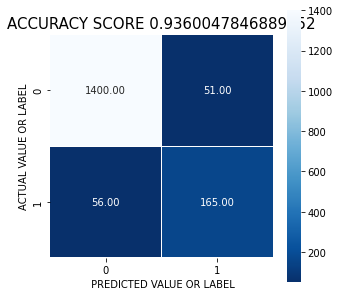

In [ ]:

# using DecisionTreeClassifier  i get accuracy 0.9360047846889952
from sklearn.tree import DecisionTreeClassifier
clf_entropy=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=3,min_samples_leaf=5)
clf_entropy.fit(x_train,y_train)
y_pred=clf_entropy.predict(x_test)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)


from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)

print("Using DecisionTreeClassifier model Accuracy is ",acc)

import matplotlib.pyplot as plt 
import seaborn as sns 

plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt=".2f",linewidths=.10,square=True,cmap='Blues_r')
plt.ylabel("ACTUAL VALUE OR LABEL")
plt.xlabel(" PREDICTED VALUE OR LABEL")
all_sample_title="ACCURACY SCORE {0}".format(acc)
plt.title(all_sample_title,size=15)
